## **Hospitals Satisfaction Survey - 2016 🏥**

#### In this dataset we have the results of a survey conducted at hospitals in Israel 2016. It includes the responses of around 11,100 patients who were hospitalized at the Surgical Ward, Internal Ward and the rest excluding those who were in the Female , Rehab, ICU Wards. 
#### *The dataset can be found on this link* : https://data.gov.il/dataset/satisfaction-hosp-general2016

##### Steps for our project :
- Go to the original excel file and make some changes before moving to work here.
- Get our data loaded in and take a look to see what we are working with.
- Clean the data and transform it into the format we see fit for use later.
- Run some EDA and gain some insights.
- Visualize our data and then build a dashboard using Tableau.

#### **Step I : Make some changes to our excel file.**

##### *After looking at the excel file it had 3 sheets: one with the data itself, another sheet that offers some explanation about what the column is about and the last one offers interpretation about the answers the patients submitted, feel free to take a look*.
##### *The only thing I did was delete a bunch of columns and rename some others and those changes are in a seperate sheet that I called 'modified', so I don't mess the raw data. More on that I will cover in a separate Medium post.*

#### **Step II : Load our data and take a look.**

##### Go to the link provided above and download the dataset. Then, add it to our project directory after making changes with the excel file.

In [18]:
# Let's check the raw data first: 

import pandas as pd

raw = pd.read_excel('satisfaction-hosp-general2016.xls', sheet_name='raw')
raw

,year,id,קוד_סקר,קודביתחולים,קוד,code_hospital,מגדר,מחלקת_אשפוז,קופת_חולים_בה_מבוטח,הגעה_מהמיון_דחוף__אלקטיבי,...,Q31_5down,AGE_TODAY,KUPAT_HOLIM,baalut,weightKlali,weightPnimi,weightChirurg,weightOther,accredit,age
0,2016,600001,1.0,1101,A,1.0,נקבה,10013,כללית,דחוף,...,NaN,66,1.0,1,2.026017,1.385848,NaN,NaN,NaN,3
1,2016,600002,1.0,1101,A,1.0,נקבה,13102,מכבי,אלקטיבי,...,0.0,69,4.0,1,2.026017,NaN,0.289177,NaN,NaN,3
2,2016,600003,1.0,1101,A,1.0,זכר,13003,כללית,הגעה ממיון,...,1.0,26,1.0,1,2.026017,NaN,0.289177,NaN,NaN,1
3,2016,600004,1.0,1101,A,1.0,נקבה,13102,לאומית,אלקטיבי,...,0.0,70,2.0,1,2.026017,NaN,0.289177,NaN,NaN,3
4,2016,600005,1.0,1101,A,1.0,זכר,13102,מכבי,אלקטיבי,...,0.0,59,4.0,1,2.026017,NaN,0.289177,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11094,2016,611095,1.0,1103,AB,2.7,זכר,13101,כללית,דחוף,...,NaN,78,1.0,1,1.069489,NaN,NaN,NaN,NaN,3
11095,2016,611096,1.0,1103,AB,2.7,זכר,13200,מאוחדת,אלקטיבי,...,NaN,62,3.0,1,1.069489,NaN,NaN,NaN,NaN,2
11096,2016,611097,1.0,1103,AB,2.7,נקבה,13002,מאוחדת,דחוף,...,0.0,84,3.0,1,1.069489,NaN,NaN,NaN,NaN,3
11097,2016,611098,1.0,1103,AB,2.7,נקבה,13002,כללית,דחוף,...,0.0,80,1.0,1,1.069489,NaN,NaN,NaN,NaN,3


##### Yeah I know, too much columns, but rest assured, I took care of that. Those who don't speak Hebrew shouldn't lose hope, yet. I will transform our data to English as we go along.

In [51]:
# Now let's see the modified version after deleting some columns.

hosp_sat = pd.read_excel('satisfaction-hosp-general2016.xls', sheet_name='modified')
hosp_sat

,id,code_hospital,Gender,Code_ward,SIZE_new,Miyun_or_Electiv,CHOICE,corridor1,CHRONIC_2,HEALTH_STATUS,...,Q30,Q33,Q34,Q36,Q37,Q3_G,q31_G,AGE_TODAY,KUPAT_HOLIM,baalut
0,600001,1.0,נקבה,1,3,1.0,3,1,1.0,5.0,...,99,99,3,1,6,1.0,NaN,66,1.0,1
1,600002,1.0,נקבה,2,3,0.0,3,0,1.0,5.0,...,2,99,1,2,6,1.0,1.0,69,4.0,1
2,600003,1.0,זכר,2,3,1.0,0,0,1.0,5.0,...,5,3,1,6,6,0.0,0.0,26,1.0,1
3,600004,1.0,נקבה,2,3,0.0,1,1,1.0,2.0,...,1,3,3,2,6,1.0,1.0,70,2.0,1
4,600005,1.0,זכר,2,3,0.0,1,1,0.0,NaN,...,2,1,3,7,6,1.0,1.0,59,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11094,611095,2.7,זכר,2,2,1.0,1,1,1.0,5.0,...,2,4,3,2,1,1.0,NaN,78,1.0,1
11095,611096,2.7,זכר,3,2,0.0,1,0,0.0,2.0,...,1,4,2,2,1,1.0,NaN,62,3.0,1
11096,611097,2.7,נקבה,2,2,1.0,0,1,0.0,3.0,...,3,4,3,2,1,0.0,0.0,84,3.0,1
11097,611098,2.7,נקבה,2,2,1.0,3,1,1.0,5.0,...,2,4,3,1,1,1.0,1.0,80,1.0,1


##### Yes what you see is correct. We went from 143 columns to 48 columns. Pretty neat.
##### So as we see, there are some columns about the patients and hospitals themselves like gender, which hospital is it, ward, language , age.. and we also have the responses they gave to around 37 questions. Looks straightforward to me. Now that we know with which kind of data we work with, let's start cleaning ! 

#### **Step III: Clean and Transform the data.**

In [52]:
hosp_sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11099 entries, 0 to 11098
Data columns (total 48 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                11099 non-null  int64  
 1   code_hospital     11099 non-null  float64
 2   Gender            11099 non-null  object 
 3   Code_ward         11099 non-null  int64  
 4   SIZE_new          11099 non-null  int64  
 5   Miyun_or_Electiv  11073 non-null  float64
 6   CHOICE            11099 non-null  int64  
 7   corridor1         11099 non-null  int64  
 8   CHRONIC_2         10847 non-null  float64
 9   HEALTH_STATUS     10871 non-null  float64
 10  Q3                11099 non-null  int64  
 11  Q31               11099 non-null  int64  
 12  Q4                11099 non-null  int64  
 13  Q5                11099 non-null  int64  
 14  Q6                11099 non-null  int64  
 15  Q7                11099 non-null  int64  
 16  Q8                11099 non-null  int64 

##### Looking at the info we got above, we need to work on these :
- Change the datatypes of code_hospital, Miyun_or_Electiv, CHRONIC_2, HEALTH_STATUS, Q3_G, q31_G and  KUPAT_HOLIM to 'object'. The reason for it is that if we look at the values sheet in the excel file all the possible answers for these should be numbers that represent a certain answer. We also need to change to object so it will be easier later when working with Tableau and plotting the values.

- Deal with the null values in the following columns: Miyun_or_Electiv, CHRONIC_2, HEALTH_STATUS, Q3_G, q31_G, KUPAT_HOLIM.

In [53]:
# Firstly, let's deal with the null values. How many null values do each of the columns above contain ?

null_columns = ['Miyun_or_Electiv', 'CHRONIC_2', 'HEALTH_STATUS', 'Q3_G', 'q31_G', 'KUPAT_HOLIM']

for null_column in null_columns:
    print(f"{null_column} column has {hosp_sat[null_column].isnull().sum()} null values.")

Miyun_or_Electiv column has 26 null values.
CHRONIC_2 column has 252 null values.
HEALTH_STATUS column has 228 null values.
Q3_G column has 160 null values.
q31_G column has 614 null values.
KUPAT_HOLIM column has 23 null values.


In [55]:
# Before starting dealing with the NaN's, let's see the different unique values each of them has:

for null_column in null_columns:
    print(f"unique values in {null_column} are : {hosp_sat[null_column].unique()}")

unique values in Miyun_or_Electiv are : [ 1.  0. nan]
unique values in CHRONIC_2 are : [ 1.  0. nan]
unique values in HEALTH_STATUS are : [ 5.  2. nan  3.  4.  1.]
unique values in Q3_G are : [ 1.  0. nan]
unique values in q31_G are : [nan  1.  0.]
unique values in KUPAT_HOLIM are : [ 1.  4.  2.  3.  5. nan]


In [56]:
# Let's start filling the NaN's.

# Miyun_or_Electiv : we will fill them with 0's .
hosp_sat['Miyun_or_Electiv'].fillna(0, inplace=True)

# CHRONIC_2 : Here we will fill with 0's as well.
hosp_sat['CHRONIC_2'].fillna(0, inplace=True)

# HEALTH_STATUS: The values corresponding to this column are ints between 1 to 5 describing the patient's general health status. We will fill with the most frequent value.
hosp_sat['HEALTH_STATUS'].fillna(hosp_sat['HEALTH_STATUS'].mode(), inplace=True)

# Q3_G: This column is about if they were satisfied in general with the treatment in the hospital. 1 indicated they are and a 0 if 'else'. we will fill with 0's.
hosp_sat['Q3_G'].fillna(0, inplace=True)

# q31_G : if they are willing to recommend the hospital as a good place to be hospitalized. 1 means yes and the 0's are 'else'. We wil fill with 0's. 
hosp_sat['q31_G'].fillna(0, inplace=True)

# KUPAT_HOLIM : it's basically the HMO in Israel. 1-4 list 4 names of the HMO's in Israel with 5 being 'else'. We will fill with 5.
hosp_sat['KUPAT_HOLIM'].fillna(5, inplace=True)


print(f"Number of NaN values after filling: {hosp_sat.isnull().sum().sum()}.")

Number of NaN values after filling: 228.


##### Hmm, what did we do wrong ? The number 228 is also the number of NaN's in the HEALTH_STATUS column so let's see:

In [64]:
hosp_sat['HEALTH_STATUS'].isnull().sum()

228

In [62]:
# Sounds like we found the culprit. Why didn't it work ? 
hosp_sat['HEALTH_STATUS'].mode()


0    4.0
Name: HEALTH_STATUS, dtype: float64

In [65]:
# The mode is correct, so why not filling?
# After a 5 seconds search on stackoverflow I found the problem. Link to it: https://stackoverflow.com/questions/42789324/how-to-pandas-fillna-with-mode-of-column

hosp_sat['HEALTH_STATUS'].fillna(hosp_sat['HEALTH_STATUS'].mode()[0], inplace=True)

print(f"Number of NaN values after filling: {hosp_sat.isnull().sum().sum()}.")

Number of NaN values after filling: 0.


##### Before moving on after dealing with NaN, let's make sure that the values all the columns have are valid:

In [69]:
for column in hosp_sat.columns:
    print(f"Unique Values in {column} column are : {hosp_sat[column].unique()}")

Unique Values in id column are : [600001 600002 600003 ... 611097 611098 611099]
Unique Values in code_hospital column are : [ 1.   2.   3.   4.   5.   6.   8.   9.  10.  11.  12.  13.  14.  15.
 16.  17.  19.  20.  23.  24.   2.7  7.  26. ]
Unique Values in Gender column are : ['נקבה' 'זכר']
Unique Values in Code_ward column are : [1 2 3]
Unique Values in SIZE_new column are : [3 2 1]
Unique Values in Miyun_or_Electiv column are : [1. 0.]
Unique Values in CHOICE column are : [3 0 1]
Unique Values in corridor1 column are : [1 0]
Unique Values in CHRONIC_2 column are : [1. 0.]
Unique Values in HEALTH_STATUS column are : [5. 2. 4. 3. 1.]
Unique Values in Q3 column are : [10  1  9  8  5  7  3  6 99  4  2]
Unique Values in Q31 column are : [99 10  1  8  5  3  9  7  4  6  2]
Unique Values in Q4 column are : [ 1 99  5  3  2 98  4]
Unique Values in Q5 column are : [ 1  5  3  2  4 99]
Unique Values in Q6 column are : [ 2  4  1  3  5 99]
Unique Values in Q7 column are : [ 2  4  1  3 99  5]
Uniq

In [70]:
# After double checking with the values presented in the excel sheet all of them are fine except the columns 'CHOICE' and 'code_hospital'. The column 'CHOICE' should be either 0 or 1. What is that annoying 3 we see there ? How many are they ? And the column 'code_hospital' has a duplicate value. let's start with the choice column:

hosp_sat['CHOICE'].value_counts()

1    6083
0    3800
3    1216
Name: CHOICE, dtype: int64

In [74]:
# Well, since that is a lot of 3's I can't just fill with either 0 or 1. But we also don't have a context about it. What we will do is use a fill technique that fills the 3 with the value precceding it.
import numpy as np
hosp_sat['CHOICE'] = hosp_sat['CHOICE'].mask(hosp_sat['CHOICE'].isin([3]),hosp_sat['CHOICE'].replace(3,np.nan).ffill())

hosp_sat['CHOICE'].value_counts()

1.0    6838
0.0    4259
Name: CHOICE, dtype: int64

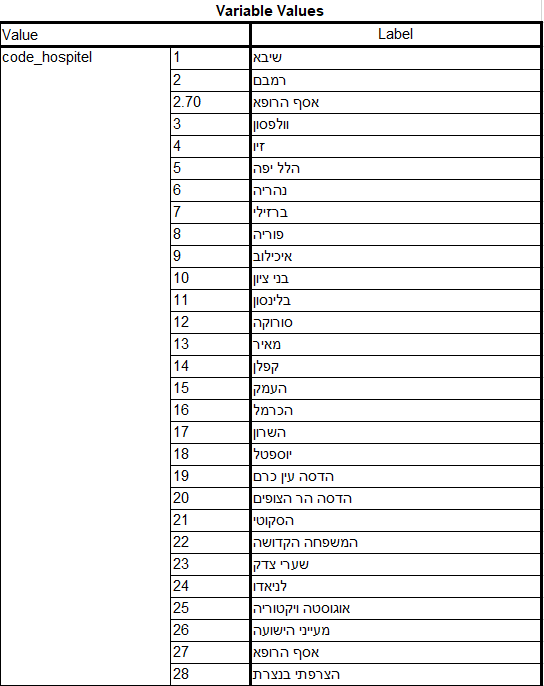

In [77]:
# If you pay close attention to the possible values for the code_hospital the values 2.7 and 27 point to the same hospital:

%matplotlib inline
from IPython.display import Image
Image(r'C:\Users\armon\OneDrive\Desktop\Capture.png')

In [80]:
# Let's change the 2.7 to 27:

hosp_sat.loc[hosp_sat['code_hospital'] == 2.70, 'code_hospital'] = 27
hosp_sat['code_hospital'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  8.,  9., 10., 11., 12., 13., 14.,
       15., 16., 17., 19., 20., 23., 24., 27.,  7., 26.])

##### Now it's time to populate the dataframe with the correct responses instead of the numbers while also translating the ones in Hebrew

In [92]:
# First off , the code_hospital column:

conditions = [hosp_sat['code_hospital'].eq(1),hosp_sat['code_hospital'].eq(2), hosp_sat['code_hospital'].eq(3), hosp_sat['code_hospital'].eq(4),
            hosp_sat['code_hospital'].eq(5), hosp_sat['code_hospital'].eq(6), hosp_sat['code_hospital'].eq(7), hosp_sat['code_hospital'].eq(8),
            hosp_sat['code_hospital'].eq(9), hosp_sat['code_hospital'].eq(10), hosp_sat['code_hospital'].eq(11), hosp_sat['code_hospital'].eq(12),
             hosp_sat['code_hospital'].eq(13),hosp_sat['code_hospital'].eq(14), hosp_sat['code_hospital'].eq(15), hosp_sat['code_hospital'].eq(16),
            hosp_sat['code_hospital'].eq(17), hosp_sat['code_hospital'].eq(18),hosp_sat['code_hospital'].eq(19), hosp_sat['code_hospital'].eq(20),
            hosp_sat['code_hospital'].eq(21), hosp_sat['code_hospital'].eq(22), hosp_sat['code_hospital'].eq(23),hosp_sat['code_hospital'].eq(24),
            hosp_sat['code_hospital'].eq(25), hosp_sat['code_hospital'].eq(26), hosp_sat['code_hospital'].eq(27), hosp_sat['code_hospital'].eq(28)]
            
choices = ['Sheba', 'Rambam', 'Wolfson', 'Ziv', 'Hillel Yaffe', 'Galilee', 'Brazilai', 'Baruch Padeh', 'Ichilov', 'Bnai Zion', 'Beilinson', 'Soroka', 'Meir', 'Kaplan', 'Emek',
            'Carmel','Hasharon', 'Yoseftal', 'Hadassah-Ein Karem', 'Hadassah-Mount Scopus', 'Nazareth Hospital EMMS', 'Holy Family', 'Shaare Zedek', 'Laniado',
            'Augusta Victoria', 'Mayanei HaYeshua', 'Shamir', 'Saint Vincent De Paul']

hosp_sat['code_hospital'] = np.select(conditions, choices, default=0)
hosp_sat.head(20)

,id,code_hospital,Gender,Code_ward,SIZE_new,Miyun_or_Electiv,CHOICE,corridor1,CHRONIC_2,HEALTH_STATUS,...,Q30,Q33,Q34,Q36,Q37,Q3_G,q31_G,AGE_TODAY,KUPAT_HOLIM,baalut
0,600001,Sheba,נקבה,1,3,1.0,NaN,1,1.0,5.0,...,99,99,3,1,6,1.0,0.0,66,1.0,1
1,600002,Sheba,נקבה,2,3,0.0,NaN,0,1.0,5.0,...,2,99,1,2,6,1.0,1.0,69,4.0,1
2,600003,Sheba,זכר,2,3,1.0,0.0,0,1.0,5.0,...,5,3,1,6,6,0.0,0.0,26,1.0,1
3,600004,Sheba,נקבה,2,3,0.0,1.0,1,1.0,2.0,...,1,3,3,2,6,1.0,1.0,70,2.0,1
4,600005,Sheba,זכר,2,3,0.0,1.0,1,0.0,4.0,...,2,1,3,7,6,1.0,1.0,59,4.0,1
5,600006,Sheba,נקבה,1,3,1.0,1.0,1,0.0,4.0,...,1,3,3,2,6,1.0,0.0,34,3.0,1
6,600007,Rambam,זכר,1,3,1.0,1.0,1,0.0,4.0,...,99,99,3,7,6,1.0,0.0,71,1.0,1
7,600008,Rambam,נקבה,1,3,1.0,1.0,1,1.0,4.0,...,1,4,3,7,6,1.0,1.0,79,1.0,1
8,600009,Rambam,נקבה,3,3,1.0,1.0,1,0.0,2.0,...,1,3,3,1,6,1.0,1.0,77,4.0,1
9,600010,Rambam,זכר,1,3,1.0,1.0,1,0.0,2.0,...,2,3,3,2,6,1.0,1.0,34,1.0,1


In [93]:
# Let's tackle the Gender column as well:

conditions = [hosp_sat['Gender'].eq('זכר'), hosp_sat['Gender'].eq('נקבה')]
choices = ['M', 'F']
hosp_sat['Gender'] = np.select(conditions, choices, default=0)
hosp_sat.sample(10)

,id,code_hospital,Gender,Code_ward,SIZE_new,Miyun_or_Electiv,CHOICE,corridor1,CHRONIC_2,HEALTH_STATUS,...,Q30,Q33,Q34,Q36,Q37,Q3_G,q31_G,AGE_TODAY,KUPAT_HOLIM,baalut
9698,609699,Hadassah-Mount Scopus,F,2,1,0.0,1.0,1,0.0,4.0,...,2,1,3,2,1,1.0,1.0,61,1.0,3
7338,607339,Meir,M,2,2,1.0,0.0,1,1.0,5.0,...,2,1,3,2,1,1.0,0.0,66,1.0,2
572,600573,Baruch Padeh,M,2,1,1.0,0.0,0,1.0,2.0,...,2,3,2,4,4,0.0,1.0,73,1.0,1
3944,603945,Wolfson,M,2,2,1.0,0.0,1,0.0,2.0,...,2,1,3,2,1,0.0,0.0,41,1.0,1
7464,607465,Meir,F,1,2,1.0,1.0,1,1.0,4.0,...,2,1,3,1,1,1.0,1.0,69,1.0,2
7689,607690,Kaplan,M,2,2,0.0,1.0,1,0.0,2.0,...,1,1,3,2,1,1.0,1.0,54,1.0,2
10465,610466,Laniado,F,1,1,1.0,1.0,1,0.0,3.0,...,4,1,3,2,1,0.0,0.0,26,3.0,5
7945,607946,Kaplan,M,1,2,1.0,1.0,1,0.0,3.0,...,1,1,3,2,1,0.0,0.0,37,3.0,2
10163,610164,Shaare Zedek,F,1,2,1.0,0.0,1,0.0,2.0,...,2,1,3,2,1,0.0,0.0,80,1.0,5
2459,602460,Carmel,M,1,2,1.0,0.0,1,1.0,4.0,...,1,3,3,2,2,1.0,1.0,66,1.0,2


In [94]:
# Now that you get the hang of it, I will speedrun through a few column except the questions:

conditions = [hosp_sat['Code_ward'].eq(1), hosp_sat['Code_ward'].eq(2), hosp_sat['Code_ward'].eq(3)]
choices = ['Internal', 'Surgical', 'Other']
hosp_sat['Code_ward'] = np.select(conditions, choices, default=0)
hosp_sat.rename({'Code_ward': 'Ward'}, axis=1, inplace=True)


conditions = [hosp_sat['SIZE_new'].eq(1), hosp_sat['SIZE_new'].eq(2), hosp_sat['SIZE_new'].eq(3)]
choices = ['Small', 'Medium', 'Big']
hosp_sat['SIZE_new'] = np.select(conditions, choices, default=0)
hosp_sat.rename({'SIZE_new': 'Hospital_size'}, axis=1, inplace=True)


conditions = [hosp_sat['Miyun_or_Electiv'].eq(1), hosp_sat['Miyun_or_Electiv'].eq(0)]
choices = ['Emergency hospitalization', 'Elective hospitalization']
hosp_sat['Miyun_or_Electiv'] = np.select(conditions, choices, default=0)
hosp_sat.rename({'Miyun_or_Electiv': 'Emergency_Or_Elective'}, axis=1, inplace=True)


conditions = [hosp_sat['CHOICE'].eq(1), hosp_sat['CHOICE'].eq(0)]
choices = ['Yes', 'No']
hosp_sat['CHOICE'] = np.select(conditions, choices, default=0)
hosp_sat.rename({'CHOICE': 'Can_Choose_Hosp'}, axis=1, inplace=True)


conditions = [hosp_sat['corridor1'].eq(1), hosp_sat['corridor1'].eq(0)]
choices = ['No', 'Yes']
hosp_sat['corridor1'] = np.select(conditions, choices, default=0)
hosp_sat.rename({'corridor1': 'Lay_Corridor'}, axis=1, inplace=True)


conditions = [hosp_sat['CHRONIC_2'].eq(1), hosp_sat['CHRONIC_2'].eq(0)]
choices = ['Yes', 'No']
hosp_sat['CHRONIC_2'] = np.select(conditions, choices, default=0)
hosp_sat.rename({'CHRONIC_2': 'Chronic'}, axis=1, inplace=True)


conditions = [hosp_sat['HEALTH_STATUS'].eq(1), hosp_sat['HEALTH_STATUS'].eq(2), hosp_sat['HEALTH_STATUS'].eq(3), hosp_sat['HEALTH_STATUS'].eq(4), hosp_sat['HEALTH_STATUS'].eq(5)]
choices = ['Excellent', 'Very Good', 'Good', 'Reasonable', 'Deficient']
hosp_sat['HEALTH_STATUS'] = np.select(conditions, choices, default=0)


conditions = [hosp_sat['KUPAT_HOLIM'].eq(1), hosp_sat['KUPAT_HOLIM'].eq(2), hosp_sat['KUPAT_HOLIM'].eq(3), hosp_sat['KUPAT_HOLIM'].eq(4), hosp_sat['KUPAT_HOLIM'].eq(5)]
choices = ['Clalit', 'Leumit', 'Meuhedet', 'Maccabi', 'Other']
hosp_sat['KUPAT_HOLIM'] = np.select(conditions, choices, default=0)


conditions = [hosp_sat['baalut'].eq(1), hosp_sat['baalut'].eq(2), hosp_sat['baalut'].eq(3), hosp_sat['baalut'].eq(5)]
choices = ['Goverment', 'Clalit', 'Hadassah', 'Public']
hosp_sat['baalut'] = np.select(conditions, choices, default=0)
hosp_sat.rename({'baalut': 'Hosp_Ownership'}, axis=1, inplace=True)

hosp_sat.sample(10)

,id,code_hospital,Gender,Ward,Hospital_size,Emergency_Or_Elective,Can_Choose_Hosp,Lay_Corridor,Chronic,HEALTH_STATUS,...,Q30,Q33,Q34,Q36,Q37,Q3_G,q31_G,AGE_TODAY,KUPAT_HOLIM,Hosp_Ownership
8295,608296,Emek,F,Other,Medium,Elective hospitalization,Yes,No,No,Very Good,...,1,1,3,2,1,1.0,0.0,75,Clalit,Clalit
3124,603125,Sheba,M,Surgical,Big,Emergency hospitalization,No,No,No,Very Good,...,1,1,3,2,1,1.0,1.0,38,Clalit,Goverment
935,600936,Hadassah-Ein Karem,M,Internal,Medium,Emergency hospitalization,No,No,Yes,Reasonable,...,1,3,3,2,3,1.0,1.0,69,Clalit,Hadassah
10458,610459,Laniado,M,Internal,Small,Emergency hospitalization,No,No,Yes,Good,...,99,3,3,1,1,1.0,0.0,63,Clalit,Public
3000,603001,Sheba,F,Internal,Big,Emergency hospitalization,Yes,No,Yes,Reasonable,...,1,3,3,2,1,1.0,1.0,64,Clalit,Goverment
3890,603891,Wolfson,M,Surgical,Medium,Emergency hospitalization,Yes,No,Yes,Deficient,...,1,1,3,2,1,1.0,1.0,41,Clalit,Goverment
2204,602205,Meir,M,Internal,Medium,Emergency hospitalization,No,No,Yes,Reasonable,...,1,3,3,2,2,1.0,1.0,54,Clalit,Clalit
10865,610866,Shamir,M,Internal,Medium,Emergency hospitalization,No,Yes,Yes,Reasonable,...,2,1,1,2,1,1.0,1.0,43,Leumit,Goverment
2591,602592,Hadassah-Ein Karem,M,Other,Medium,Emergency hospitalization,No,Yes,Yes,Deficient,...,2,3,2,2,2,1.0,1.0,93,Clalit,Hadassah
406,600407,Ziv,F,Internal,Small,Emergency hospitalization,No,No,No,Reasonable,...,3,3,3,4,4,1.0,1.0,47,Leumit,Goverment


##### The only things left are the questions: Changing the column title instead of Q-something to the actual question, also changing the values in each of those columns to their interpretation. After a little thinking, we will not be doing that. First off the questions themselves are very long and will take too much space. The only thing we will be doing is just change the values to each column but keep the column title as it is. I will translate them later and store in a different dataframe. Let's get started:

In [95]:
# Q3 is basically the satisfaction score from 1 to 10. No need for masking here. We will only change the column name:
hosp_sat.rename({'Q3': 'sat_score'}, axis=1, inplace=True)


# Q31 is if they would recommend for other to be hospitalized in that hospital. No need for masking here. We will only change the column name:
hosp_sat.rename({'Q31': 'would_recommend'}, axis=1, inplace=True)


# Since a lot of questions have similiar values as answers , I'd like to do them all at once, maybe use a loop. Let's group columns that have similiar values:
# P.S : The columns we won't include in the following group is either because the values for them are completely different or because there are some values or extra values
# that don't have the same interpretation for the same answer so we will do them seperately afterwards.

group = ['Q5', 'Q6', 'Q7','Q9', 'Q10', 'Q11','Q14', 'Q15','Q17','Q21_2016', 'Q22', 'Q23', 'Q24','Q27', 'Q28']

for column in group:
    conditions = [hosp_sat[column].eq(1), hosp_sat[column].eq(2), hosp_sat[column].eq(3), hosp_sat[column].eq(4), hosp_sat[column].eq(5), hosp_sat[column].eq(99)]
    choices = ['Very Satisfied', 'Satisfied', 'Neutral', 'Dissatisfied', 'Very Dissatisfied', 'Do not know / irrelevant']
    hosp_sat[column] = np.select(conditions, choices, default=0)



conditions = [hosp_sat['Q4'].eq(1), hosp_sat['Q4'].eq(2), hosp_sat['Q4'].eq(3), hosp_sat['Q4'].eq(4), hosp_sat['Q4'].eq(5), hosp_sat['Q4'].eq(98), hosp_sat['Q4'].eq(99)]
choices = ['Very Satisfied', 'Satisfied', 'Neutral', 'Dissatisfied', 'Very Dissatisfied', 'Was not emergency hospitalization', 'Do not know / irrelevant']
hosp_sat['Q4'] = np.select(conditions, choices, default=0)

conditions = [hosp_sat['Q8'].eq(1), hosp_sat['Q8'].eq(2), hosp_sat['Q8'].eq(3), hosp_sat['Q8'].eq(4), hosp_sat['Q8'].eq(5), hosp_sat['Q8'].eq(6), hosp_sat['Q8'].eq(99)]
choices = ['Very Satisfied', 'Satisfied', 'Neutral', 'Dissatisfied', 'Very Dissatisfied','Did not receive explanation', 'Do not know / irrelevant']
hosp_sat['Q8'] = np.select(conditions, choices, default=0)

conditions = [hosp_sat['Q12'].eq(1), hosp_sat['Q12'].eq(2), hosp_sat['Q12'].eq(3), hosp_sat['Q12'].eq(4), hosp_sat['Q12'].eq(5), hosp_sat['Q12'].eq(6), hosp_sat['Q12'].eq(99)]
choices = ['Very Satisfied', 'Satisfied', 'Neutral', 'Dissatisfied', 'Very Dissatisfied','Did not receive explanation', 'Do not know / irrelevant']
hosp_sat['Q12'] = np.select(conditions, choices, default=0)

conditions = [hosp_sat['Q13'].eq(1), hosp_sat['Q13'].eq(2), hosp_sat['Q13'].eq(3), hosp_sat['Q13'].eq(4), hosp_sat['Q13'].eq(5), hosp_sat['Q13'].eq(6), hosp_sat['Q13'].eq(98), hosp_sat['Q13'].eq(99)]
choices = ['Very Satisfied', 'Satisfied', 'Neutral', 'Dissatisfied', 'Very Dissatisfied', "don't know/couldn't know", "don't know/couldn't know", 'irrelevant']
hosp_sat['Q13'] = np.select(conditions, choices, default=0)

conditions = [hosp_sat['Q16'].eq(1), hosp_sat['Q16'].eq(2), hosp_sat['Q16'].eq(3), hosp_sat['Q16'].eq(4), hosp_sat['Q16'].eq(5), hosp_sat['Q16'].eq(98), hosp_sat['Q16'].eq(99)]
choices = ['Very Satisfied', 'Satisfied', 'Neutral', 'Dissatisfied', 'Very Dissatisfied', "didn't suffer / didn't want to get treatment for pain", "don't know"]
hosp_sat['Q16'] = np.select(conditions, choices, default=0)

conditions = [hosp_sat['Q18'].eq(1), hosp_sat['Q18'].eq(2), hosp_sat['Q18'].eq(3), hosp_sat['Q18'].eq(4), hosp_sat['Q18'].eq(5), hosp_sat['Q18'].eq(97), hosp_sat['Q18'].eq(98), hosp_sat['Q18'].eq(99)]
choices = ['Very Satisfied', 'Satisfied', 'Neutral', 'Dissatisfied', 'Very Dissatisfied', 'Not interested in being shared with the information', 'My medical condition did not allow for sharing', "Don't know"]
hosp_sat['Q18'] = np.select(conditions, choices, default=0)

conditions = [hosp_sat['Q19'].eq(1), hosp_sat['Q19'].eq(2), hosp_sat['Q19'].eq(3), hosp_sat['Q19'].eq(4), hosp_sat['Q19'].eq(5), hosp_sat['Q19'].eq(6), hosp_sat['Q19'].eq(99)]
choices = ['Very Satisfied', 'Satisfied', 'Neutral', 'Dissatisfied', 'Very Dissatisfied', 'There were no alternatives', "Don't know"]
hosp_sat['Q19'] = np.select(conditions, choices, default=0)

conditions = [hosp_sat['Q20'].eq(1), hosp_sat['Q20'].eq(2), hosp_sat['Q20'].eq(3), hosp_sat['Q20'].eq(4), hosp_sat['Q20'].eq(99)]
choices = ['Always', 'Usually Yes', 'Usually No', 'Never', "Don't know"]
hosp_sat['Q20'] = np.select(conditions, choices, default=0)

conditions = [hosp_sat['Q25'].eq(1), hosp_sat['Q25'].eq(2), hosp_sat['Q25'].eq(3), hosp_sat['Q25'].eq(4), hosp_sat['Q25'].eq(5), hosp_sat['Q25'].eq(6), hosp_sat['Q25'].eq(99)]
choices = ['Very Satisfied', 'Satisfied', 'Neutral', 'Dissatisfied', 'Very Dissatisfied','Did not receive explanation', 'Do not know']
hosp_sat['Q25'] = np.select(conditions, choices, default=0)

conditions = [hosp_sat['Q26'].eq(1), hosp_sat['Q26'].eq(2), hosp_sat['Q26'].eq(3), hosp_sat['Q26'].eq(4), hosp_sat['Q26'].eq(99)]
choices = ['Always', 'Usually Yes', 'Usually No', 'Never', "Don't know"]
hosp_sat['Q26'] = np.select(conditions, choices, default=0)

conditions = [hosp_sat['Q29'].eq(1), hosp_sat['Q29'].eq(2), hosp_sat['Q29'].eq(3), hosp_sat['Q29'].eq(4), hosp_sat['Q29'].eq(5), hosp_sat['Q29'].eq(98), hosp_sat['Q29'].eq(99)]
choices = ['Very Satisfied', 'Satisfied', 'Neutral', 'Dissatisfied', 'Very Dissatisfied', "Didn't eat the hospital food", "Don't know / irrelevant"]
hosp_sat['Q29'] = np.select(conditions, choices, default=0)
hosp_sat.rename({'Q29': 'Hospital_food'}, axis=1, inplace=True)


conditions = [hosp_sat['Q30'].eq(1), hosp_sat['Q30'].eq(2), hosp_sat['Q30'].eq(3), hosp_sat['Q30'].eq(4), hosp_sat['Q30'].eq(5), hosp_sat['Q30'].eq(98), hosp_sat['Q30'].eq(99)]
choices = ['Very Satisfied', 'Satisfied', 'Neutral', 'Dissatisfied', 'Very Dissatisfied', 'Had no companions', "Don't know"]
hosp_sat['Q30'] = np.select(conditions, choices, default=0)

conditions = [hosp_sat['Q33'].eq(1), hosp_sat['Q33'].eq(2), hosp_sat['Q33'].eq(3), hosp_sat['Q33'].eq(4), hosp_sat['Q33'].eq(5), hosp_sat['Q33'].eq(6), hosp_sat['Q33'].eq(99)]
choices = ['Hebrew', 'English', 'Arabic', 'Russian', 'Amharic', 'Other', 'Refused to answer']
hosp_sat['Q33'] = np.select(conditions, choices, default=0)
hosp_sat.rename({'Q33': 'Language'}, axis=1, inplace=True)

conditions = [hosp_sat['Q34'].eq(1), hosp_sat['Q34'].eq(2), hosp_sat['Q34'].eq(3)]
choices = ['Entirety', 'Partly', 'At all']
hosp_sat['Q34'] = np.select(conditions, choices, default=0)
hosp_sat.rename({'Q34': 'corridor_stay'}, axis=1, inplace=True) # and since we have another column called Lay_Corridor let's drop that one
hosp_sat.drop('Lay_Corridor', axis=1, inplace=True)

conditions = [hosp_sat['Q36'].eq(1), hosp_sat['Q36'].eq(2), hosp_sat['Q36'].eq(3), hosp_sat['Q36'].eq(4), hosp_sat['Q36'].eq(5), hosp_sat['Q36'].eq(6), hosp_sat['Q36'].eq(7)]
choices = ['Alone', 'With Family Member', 'Home with a caregiver', 'At Family member', 'Assisted living/nursing home', 'Nursing facility/rehabilitation center', 'Refused to answer']
hosp_sat['Q36'] = np.select(conditions, choices, default=0)
hosp_sat.rename({'Q36': 'Recently_lived_with'}, axis=1, inplace=True)

conditions = [hosp_sat['Q37'].eq(1), hosp_sat['Q37'].eq(2), hosp_sat['Q37'].eq(3), hosp_sat['Q37'].eq(4), hosp_sat['Q37'].eq(5), hosp_sat['Q37'].eq(6)]
choices = ['Jewish', 'Muslim', 'Christian', 'Druze', 'Other', 'Refused to answer']
hosp_sat['Q37'] = np.select(conditions, choices, default=0)
hosp_sat.rename({'Q37': 'Religion'}, axis=1, inplace=True)


#############################################
# Let's see if all our hard work paid off :
hosp_sat.sample(20)

,id,code_hospital,Gender,Ward,Hospital_size,Emergency_Or_Elective,Can_Choose_Hosp,Chronic,HEALTH_STATUS,sat_score,...,Q30,Language,corridor_stay,Recently_lived_with,Religion,Q3_G,q31_G,AGE_TODAY,KUPAT_HOLIM,Hosp_Ownership
6489,606490,Beilinson,F,Surgical,Big,Emergency hospitalization,Yes,Yes,Good,10,...,Satisfied,Hebrew,At all,With Family Member,Jewish,1.0,1.0,46,Clalit,Clalit
4893,604894,Brazilai,F,Internal,Medium,Elective hospitalization,Yes,No,Reasonable,10,...,Satisfied,Hebrew,At all,With Family Member,Jewish,1.0,1.0,64,Clalit,Goverment
7359,607360,Meir,M,Surgical,Medium,Emergency hospitalization,No,Yes,Good,8,...,Dissatisfied,Hebrew,At all,With Family Member,Jewish,1.0,1.0,63,Clalit,Clalit
7583,607584,Meir,F,Internal,Medium,Emergency hospitalization,Yes,Yes,Good,8,...,Neutral,Hebrew,At all,With Family Member,Jewish,1.0,0.0,65,Clalit,Clalit
2014,602015,Beilinson,M,Internal,Big,Emergency hospitalization,Yes,No,Deficient,8,...,Very Satisfied,Arabic,At all,With Family Member,Muslim,1.0,1.0,71,Clalit,Clalit
6215,606216,Bnai Zion,M,Other,Medium,Elective hospitalization,No,No,Reasonable,1,...,Satisfied,Hebrew,At all,Alone,Jewish,0.0,0.0,75,Clalit,Goverment
1476,601477,Hillel Yaffe,M,Other,Medium,Emergency hospitalization,Yes,No,Reasonable,10,...,Satisfied,Arabic,At all,With Family Member,Muslim,1.0,1.0,23,Clalit,Goverment
8748,608749,Carmel,F,Surgical,Medium,Emergency hospitalization,No,No,Deficient,10,...,Very Satisfied,Hebrew,At all,Alone,Jewish,1.0,1.0,76,Clalit,Clalit
4905,604906,Brazilai,F,Internal,Medium,Elective hospitalization,No,No,Reasonable,8,...,Very Dissatisfied,Hebrew,Entirety,With Family Member,Jewish,1.0,0.0,47,Clalit,Goverment
1506,601507,Galilee,M,Surgical,Medium,Emergency hospitalization,No,No,Deficient,5,...,Very Dissatisfied,Arabic,At all,With Family Member,Muslim,0.0,0.0,50,Clalit,Goverment


In [98]:
# Columns Q3_G and q31_G are redundant , let's drop them:
hosp_sat.drop('Q3_G', axis=1, inplace=True)
hosp_sat.drop('q31_G', axis=1, inplace=True)

hosp_sat.shape

(11099, 45)

##### By now we already dealt with the NaN's , made sure all our entries are valid, translated what we needed to, populated with the answer itself instead of it's number, dropped the irrelevant columns. Last thing, I will check again what are the datatypes of the columns to make sure it's ok before moving it to Tableau.

In [100]:
hosp_sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11099 entries, 0 to 11098
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     11099 non-null  int64 
 1   code_hospital          11099 non-null  object
 2   Gender                 11099 non-null  object
 3   Ward                   11099 non-null  object
 4   Hospital_size          11099 non-null  object
 5   Emergency_Or_Elective  11099 non-null  object
 6   Can_Choose_Hosp        11099 non-null  object
 7   Chronic                11099 non-null  object
 8   HEALTH_STATUS          11099 non-null  object
 9   sat_score              11099 non-null  int64 
 10  would_recommend        11099 non-null  int64 
 11  Q4                     11099 non-null  object
 12  Q5                     11099 non-null  object
 13  Q6                     11099 non-null  object
 14  Q7                     11099 non-null  object
 15  Q8                 

In [101]:
# Final touch-ups 

# rename code_hospital to Hospital:
hosp_sat.rename({'code_hospital': 'HOSPITAL'}, axis=1, inplace=True)

# convert sat_score and would_recommend because they are categorical data: 
hosp_sat['sat_score'] = hosp_sat['sat_score'].astype('object')
hosp_sat['would_recommend'] = hosp_sat['would_recommend'].astype('object')

print(hosp_sat['sat_score'].dtype)
print(hosp_sat['would_recommend'].dtype)

object
object


##### Now that have cleaned our data and transformed it into the way we want it to be, let's save it as a xlsx file to use later in Tableau.

In [102]:
hosp_sat.to_excel('hosp_sat.xlsx')

#### **Step IV + V : Exploratory Data Analysis & Visualization**

In [167]:
# Before continuing let's translate the questions and add in a dataframe so it would be easier for you to follow up:

pd.options.display.max_colwidth = 300


questions = {'Question':
            ['Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15','Q16','Q17', 'Q18', 'Q19','Q20', 'Q21_2016', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q30'],

            'Translation': [
            "If you were hospitalized through the emergency room, to what extent were you satisfied with the care you received?",
            "From the moment you arrived at the ward, to what extent was the admission process conducted efficiently?",
            "During your last hospitalization, to what extent did you feel that the nurses treated you with kindness and respect?",
            "To what extent did the nurses listen to you and address your questions and concerns?",
            "To what extent were the explanations you received during hospitalization from the nurses clear and understandable to you?",
            "During your last hospitalization, to what extent did you feel that the doctors treated you with kindness and respect?",
            "To what extent during the doctors visit did you feel that you were treated personally?",
            "To what extent did the doctors listen to you and address your questions and concerns?",
            "To what extent were the explanations you received during hospitalization from the doctors clear and understandable to you?", 
            "To what extent did you feel that the staff treating you at the hospital knew your medical condition before hospitalization?",
            "To what extent were the explanations given to you during the hospitalization initiated by the ward staff?",
            "To what extent did you feel that the department staff worked in coordination and cooperation (among themselves) in everything related to your care? (For example, transferring information from one to another, implementing the doctors' recommendations)",
            "To what extent did you feel that the staff addressed your pain or other symptoms such as nausea or dizziness, and helped you deal with them?",
            "To what extent did you feel that the care team works to maintain your safety to prevent medical errors in cases such as identifying a patient sensitivity to medications, preventing falls, etc.?",
            "To what extent did you feel that you were shared with the therapeutic options, to the extent that you were interested? That is, you were involved in the decisions, and your preferences were taken into account.",
            "To what extent did you feel that additional treatment methods / therapeutic alternatives were presented to you?",
            "During the last hospitalization, did you feel that you knew what the next step in hospital treatment was?",
            "To what extent did you feel that you received an answer to your requests and needs easily and without the need to make an effort?",
            "To what extent did you feel during the hospitalization that you were treated in good hands?",
            "To what extent was the discharge process from the hospital conducted efficiently?",
            "At the time of discharge from the hospital, to what extent did you receive an explanation summarizing your medical problem and the treatment you were given?",
            "To what extent were the explanations and instructions for further treatment clear and understandable to you? This refers to explanations regarding the medical problem for which you were hospitalized, the treatment given to you, unusual symptoms to be aware of and medications you must take.",
            "Were the room and bathroom clean?",
            "To what extent are you satisfied with the conditions in the room where you were hospitalized? (air conditioning, bed, mattress...)",
            "During the hospitalization, to what extent was it quiet at night in your room and in your surroundings?",
            "To what extent were the conditions available to your companions and visitors comfortable and adequate?"]
            }

questions_df = pd.DataFrame(questions)
questions_df

,Question,Translation
0,Q4,"If you were hospitalized through the emergency room, to what extent were you satisfied with the care you received?"
1,Q5,"From the moment you arrived at the ward, to what extent was the admission process conducted efficiently?"
2,Q6,"During your last hospitalization, to what extent did you feel that the nurses treated you with kindness and respect?"
3,Q7,To what extent did the nurses listen to you and address your questions and concerns?
4,Q8,To what extent were the explanations you received during hospitalization from the nurses clear and understandable to you?
5,Q9,"During your last hospitalization, to what extent did you feel that the doctors treated you with kindness and respect?"
6,Q10,To what extent during the doctors visit did you feel that you were treated personally?
7,Q11,To what extent did the doctors listen to you and address your questions and concerns?
8,Q12,To what extent were the explanations you received during hospitalization from the doctors clear and understandable to you?
9,Q13,To what extent did you feel that the staff treating you at the hospital knew your medical condition before hospitalization?


##### let's start with seeing which hospital got the more patients:

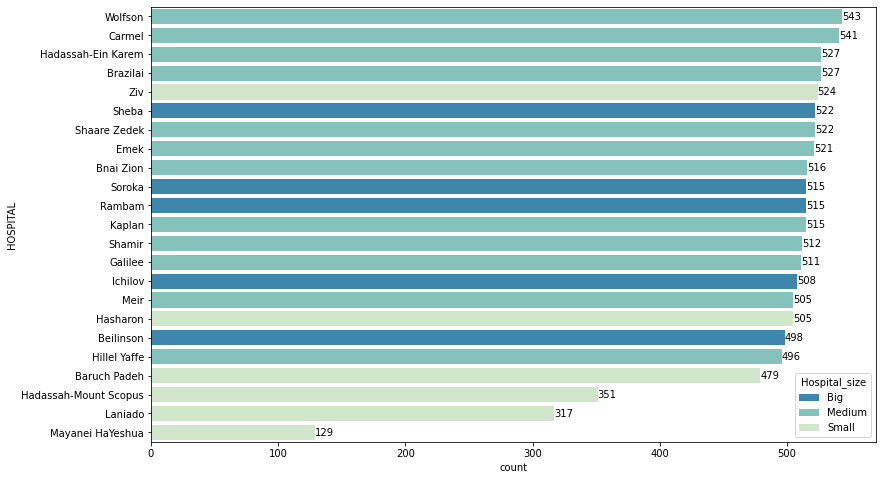

In [173]:
import matplotlib.pylab as plt
import seaborn as sns 

plt.figure(figsize=(13,8))
ax = sns.countplot(y=hosp_sat["HOSPITAL"], hue=hosp_sat['Hospital_size'], order = hosp_sat['HOSPITAL'].value_counts().index, dodge=False, palette='GnBu_r');
for label in ax.containers:
    ax.bar_label(label);
ax;

##### How many male and female patients did we have ?

In [147]:
hosp_sat.Gender.value_counts()

M    6118
F    4981
Name: Gender, dtype: int64

##### The average age among patients :

In [151]:
hosp_sat.AGE_TODAY.mean().__round__(2)

57.88

##### Is the average age similiar when seperated by gender ?

In [153]:
hosp_sat.groupby('Gender', as_index=False)['AGE_TODAY'].mean().__round__(2)

,Gender,AGE_TODAY
0,F,58.02
1,M,57.77


##### Which ward had the most patients :

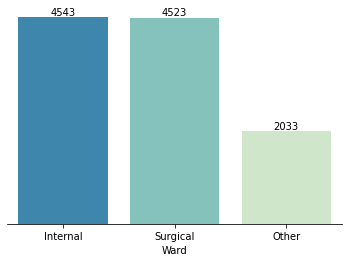

In [164]:
ax = sns.countplot(x=hosp_sat['Ward'], palette='GnBu_r');
ax.bar_label(ax.containers[0]);
ax.get_yaxis().set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

##### Health status & Chronic conditions:

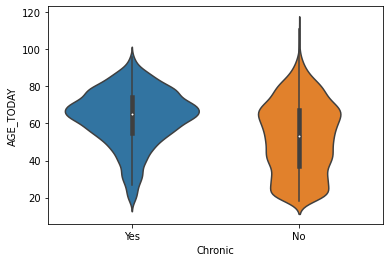

In [178]:
sns.violinplot(x=hosp_sat["Chronic"], y=hosp_sat["AGE_TODAY"]);

##### Kupat Holim :

In [181]:
hosp_sat['KUPAT_HOLIM'].value_counts()

Clalit      6918
Maccabi     1896
Meuhedet    1130
Leumit       900
Other        255
Name: KUPAT_HOLIM, dtype: int64

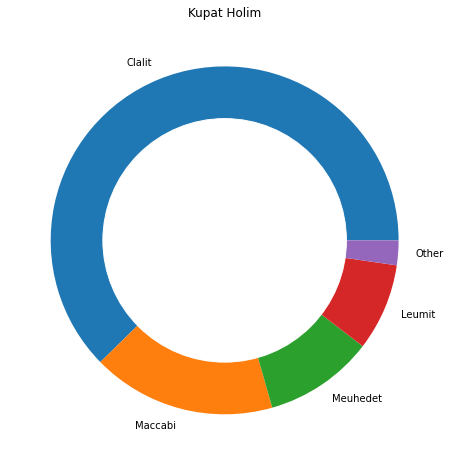

In [192]:
# Data
names = hosp_sat['KUPAT_HOLIM'].value_counts().index
size = hosp_sat['KUPAT_HOLIM'].value_counts()
 
# create a figure and set different background
fig = plt.figure(figsize=(8,8))
fig.patch.set_facecolor('white')
 
# Change color of text
plt.rcParams['text.color'] = 'black'
 
# Create a circle at the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
 
# Pieplot + circle on it
plt.pie(size, labels=names)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Kupat Holim')
plt.show()

##### Language and it's relation to the satisfaction score:

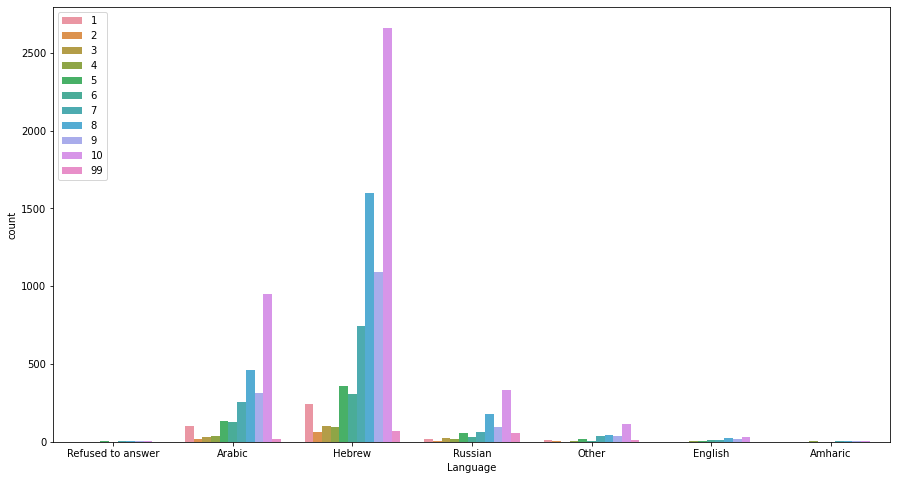

In [208]:
plt.figure(figsize=(15,8))
sns.countplot(x=hosp_sat['Language'], hue=hosp_sat['sat_score']);
plt.legend(loc='upper left');

In [205]:
hosp_sat['Language'].value_counts()

Hebrew               7324
Arabic               2452
Russian               882
Other                 290
English               106
Refused to answer      27
Amharic                18
Name: Language, dtype: int64

##### Let's check a few questions as well, starting with question Q13 : *To what extent did you feel that the staff treating you at the hospital knew your medical condition before hospitalization?*


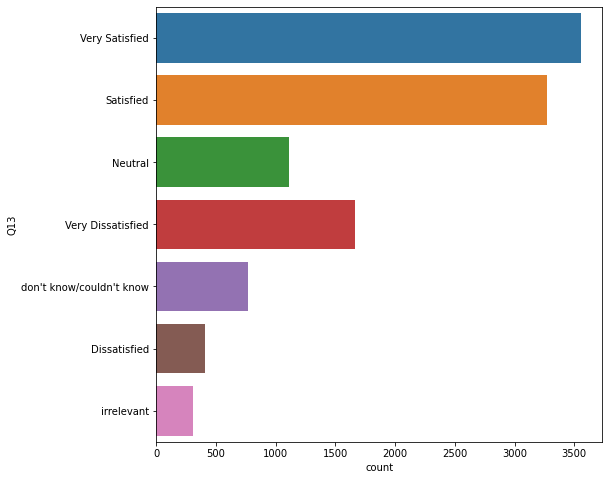

In [212]:
plt.figure(figsize=(8,8))
sns.countplot(y=hosp_sat['Q13']);

##### Q16 : *To what extent did you feel that the staff addressed your pain or other symptoms such as nausea or dizziness, and helped you deal with them?*

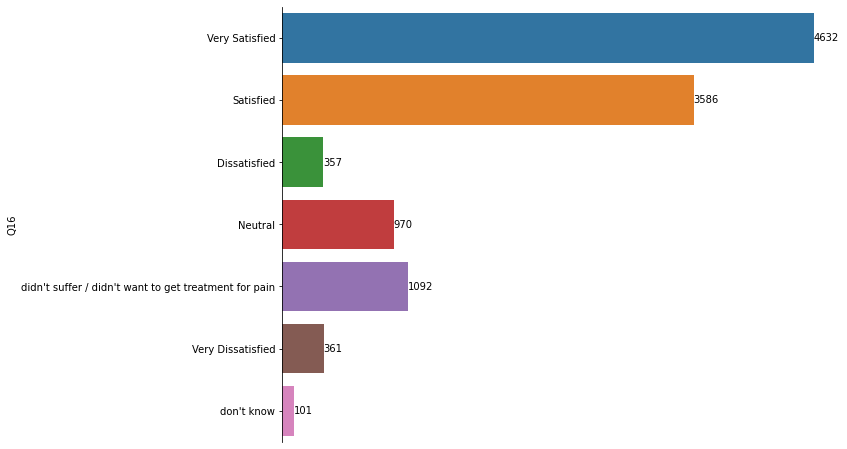

In [218]:
plt.figure(figsize=(10,8))
ax = sns.countplot(y=hosp_sat['Q16']);
ax.bar_label(ax.containers[0]);
ax.get_xaxis().set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax;

##### Q24: *At the time of discharge from the hospital, to what extent did you receive an explanation summarizing your medical problem and the treatment you were given?*

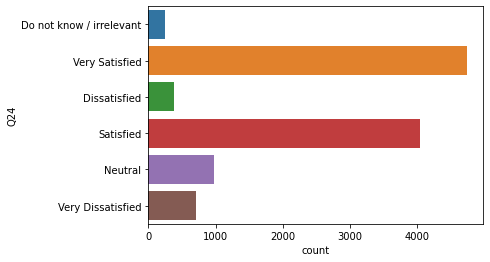

In [220]:
sns.countplot(y=hosp_sat['Q24']);

#### **That's about it for this notebook. Now it's time to grab the excel file we saved earlier after cleaning the data and go to Tableau to build a dashboard.**